In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df_iam = pd.read_excel('D:\File_Analisa_Python\IAM.xlsx')

df_iam
plt.style.use('ggplot')

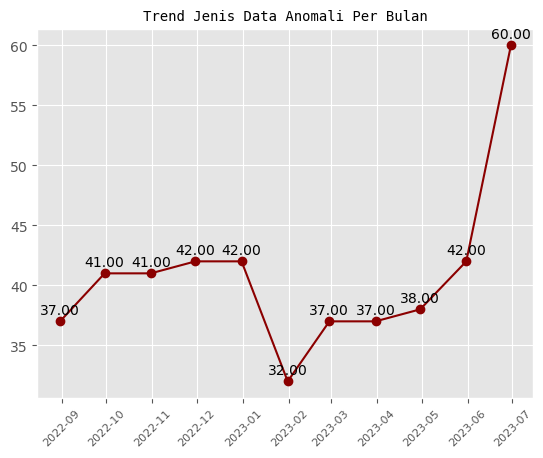

In [153]:
df_sum = df_iam[['POSISI','ANOMALI']]
df_sum = df_sum.drop_duplicates(subset=['POSISI','ANOMALI'])

df_sum=df_sum.groupby('POSISI').count()
df_sum = df_sum.reset_index()

plt.plot(df_sum['POSISI'],df_sum['ANOMALI'], marker='o', color='darkred')

for x,y in zip(df_sum['POSISI'],df_sum['ANOMALI']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xticks(fontsize=8, rotation=45)
plt.title('Trend Jenis Data Anomali Per Bulan',fontsize=10, font='monospace')
plt.show()

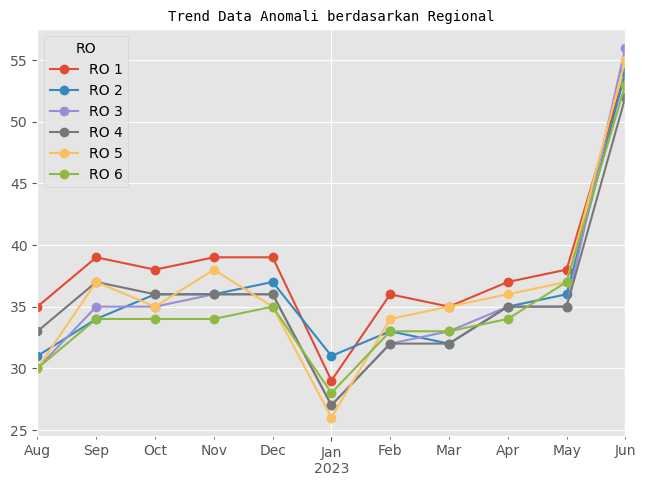

In [549]:
df_ro = df_iam[['POSISI','RO','ANOMALI']].drop_duplicates(subset=['POSISI','RO','ANOMALI'])

df_ro = df_ro.groupby(['POSISI','RO']).count().reset_index()

df_ro = df_ro.pivot(index='POSISI', columns='RO', values='ANOMALI')

df_ro.drop(columns='PUSAT').plot(marker='o')
plt.title('Trend Data Anomali berdasarkan Regional',fontsize=10, font='monospace')
plt.xlabel('')
plt.tight_layout(pad=0.5)
plt.show()

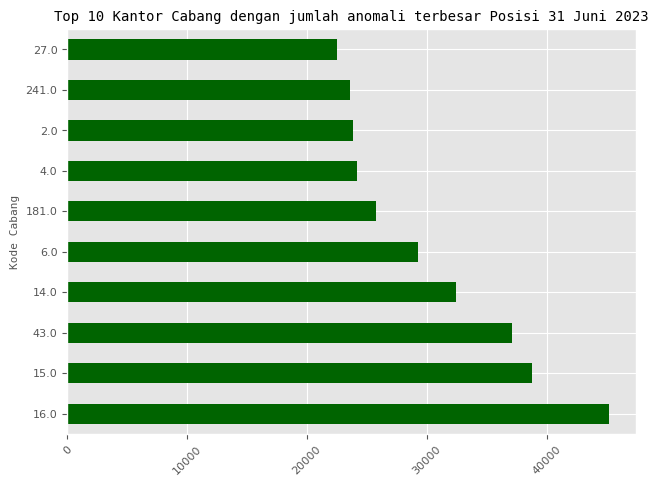

In [552]:
df_cab = df_iam[['POSISI','CABANG','NAMACAB','ANOMALI','JUMLAH']]

df_cab = df_cab.groupby(['POSISI','CABANG']).sum('JUMLAH')

df_cab = df_cab.reset_index()

df_cab = df_cab[df_cab['POSISI'] == '2023-06-30'].drop(columns='POSISI').set_index('CABANG')

df_cab = df_cab.sort_values(by='JUMLAH', ascending=False).head(10)

df_cab.plot(kind='barh', legend=False, color='darkgreen', fontsize=8)

plt.title('Top 10 Kantor Cabang dengan jumlah anomali terbesar Posisi 31 Juni 2023', fontsize=9, font='monospace')
plt.ylabel('Kode Cabang', fontsize=8, font='monospace')
plt.xticks(fontsize=8, rotation=45)
plt.tight_layout(pad=0.5)
plt.show()